In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv(r'C:\Users\91916\Desktop\VARUN\python_guvi\guvi\Datasets\Copper_set.csv')

C:\Users\91916\AppData\Local\Temp\ipykernel_18512\605574706.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\91916\Desktop\VARUN\python_guvi\guvi\Datasets\Copper_set.csv')


In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df['customer'].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
#Verifying the null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
#Filling the null values with appropriate data

In [7]:
df['item_date'] = pd.to_datetime(df['item_date'].astype(str), format='%Y%m%d.0', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'].astype(str), format='%Y%m%d.0', errors='coerce')

In [8]:
mean = df['item_date'].mean()
df['item_date'] = df['item_date'].fillna(mean)

In [9]:
country_mode = df['country'].mode()
country_mode

0    78.0
Name: country, dtype: float64

In [10]:
df['country'] = df['country'].fillna(78.0)

In [11]:
customer_mode = df['customer'].mode()
customer_mode

0    30157111.0
Name: customer, dtype: float64

In [12]:
df['customer'] = df['customer'].fillna(30157111.0)

In [13]:
application_mode = df['application'].mode()
application_mode

0    10.0
Name: application, dtype: float64

In [14]:
df['application'] = df['application'].fillna(10.0)

In [15]:
status_mode = df['status'].mode()
status_mode

0    Won
Name: status, dtype: object

In [16]:
df['status']= df['status'].fillna('Won')

In [17]:
mean_1 = df['thickness'].mean()
df['thickness'] = df['thickness'].fillna(mean_1)

In [18]:
# Handling negative prices: Convert negative prices to absolute values
df['selling_price'] = df['selling_price'].abs()
# Handling zero prices: Replace zeros with NaN
df['selling_price'].replace(0, np.nan, inplace=True)
mean_2 = df['selling_price'].mean()
df['selling_price'] = df['selling_price'].fillna(mean_2)

C:\Users\91916\AppData\Local\Temp\ipykernel_18512\546698866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selling_price'].replace(0, np.nan, inplace=True)


In [19]:
mean_3 = df['delivery date'].mean()
df['delivery date'] = df['delivery date'].fillna(mean_3)

In [20]:
df.drop('id', axis=1, inplace=True)

In [21]:
df.drop('material_ref', axis=1, inplace=True)

In [22]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
# Handling negative prices: Convert negative prices to absolute values
df['quantity tons'] = df['quantity tons'].abs()

In [23]:
mean_4 = df['quantity tons'].mean()
df['quantity tons'] = df['quantity tons'].fillna(mean_4)

In [24]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [25]:
mapping = { 'Won':1, 'Lost':0, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
       'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable': 8,}
df.replace({'status': mapping}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_18512\4492210.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'status': mapping}, inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181673 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  float64       
 4   status         181673 non-null  int64         
 5   item type      181673 non-null  object        
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   product_ref    181673 non-null  int64         
 10  delivery date  181673 non-null  datetime64[ns]
 11  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(2), object(1)
memory usage: 16.6+ MB


In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181673.0,5874.94803,0.00001,10.970711,30.365004,67.161454,1000000000.0,2349074.776438
customer,181673.0,30512207.073368,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.626356
country,181673.0,44.898125,25.0,26.0,30.0,78.0,113.0,24.405794
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
application,181673.0,25.613746,2.0,10.0,15.0,41.0,99.0,17.753909
thickness,181673.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181673,2021-01-25 22:44:26.223372288,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN


In [ ]:
#Encoding the item type

In [28]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [29]:
mapping_1 = { 'W':0, 'WI':1, 'S':2, 'Others':3, 'PL':4,
       'IPL':5, 'SLAWR':6}
df.replace({'item type': mapping_1}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_18512\944810349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'item type': mapping_1}, inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181673 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  float64       
 4   status         181673 non-null  int64         
 5   item type      181673 non-null  int64         
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   product_ref    181673 non-null  int64         
 10  delivery date  181673 non-null  datetime64[ns]
 11  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(3)
memory usage: 16.6 MB


In [31]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

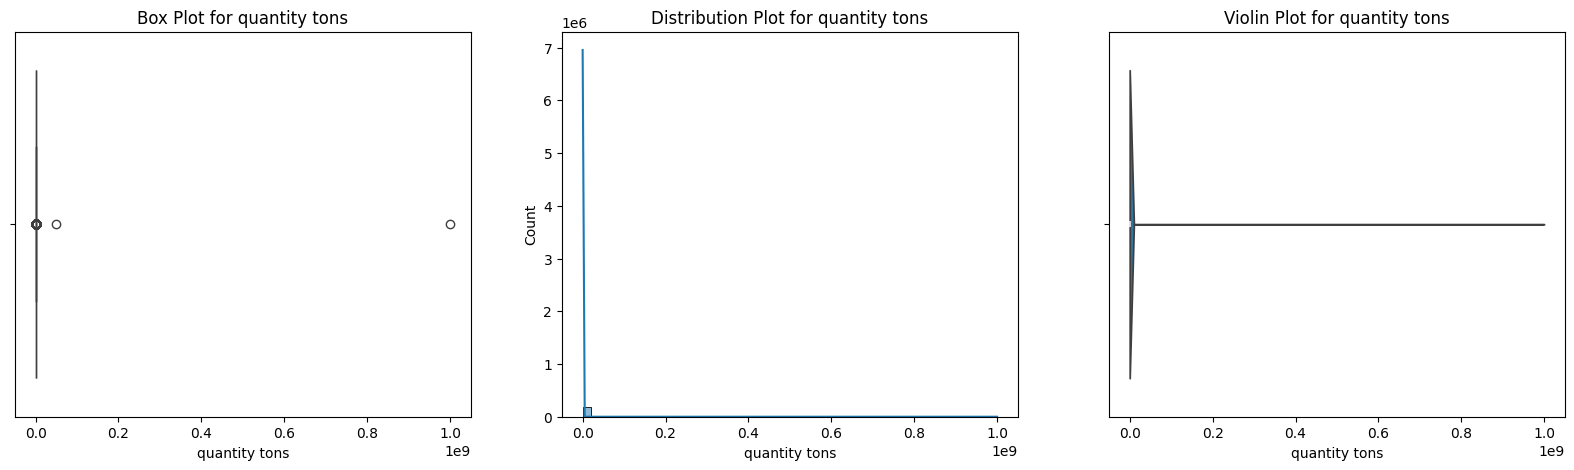

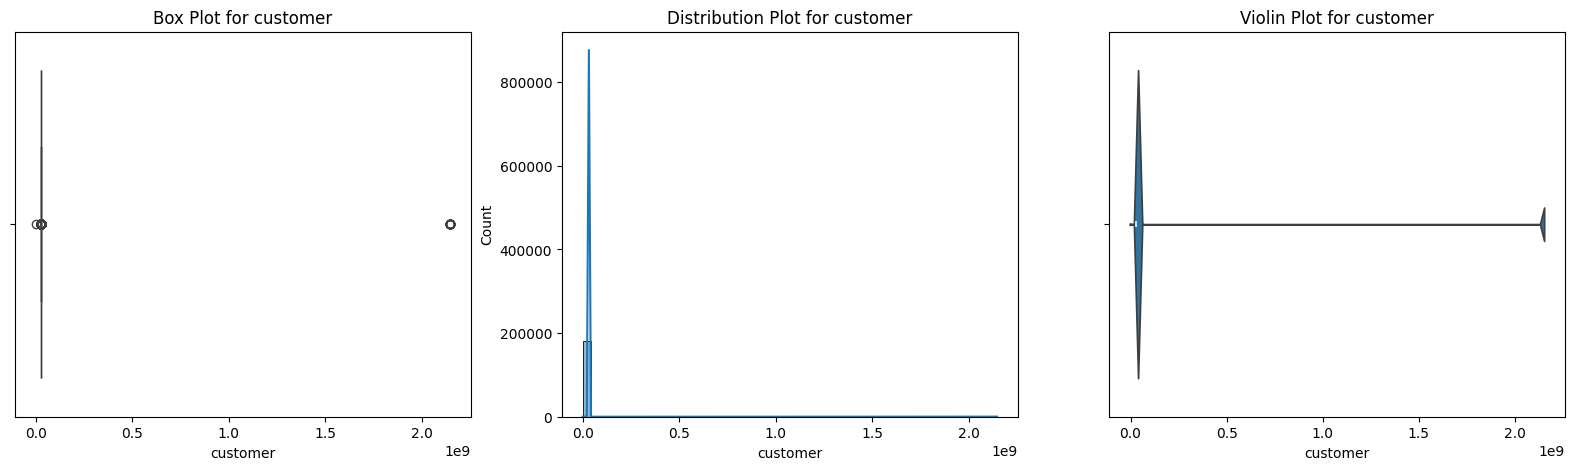

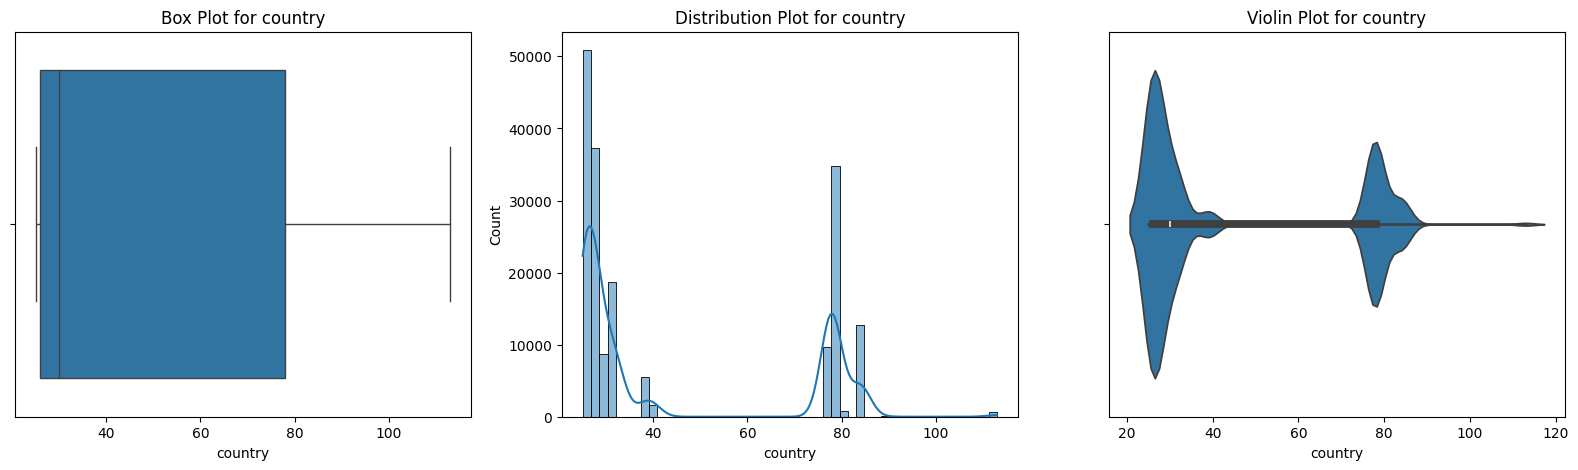

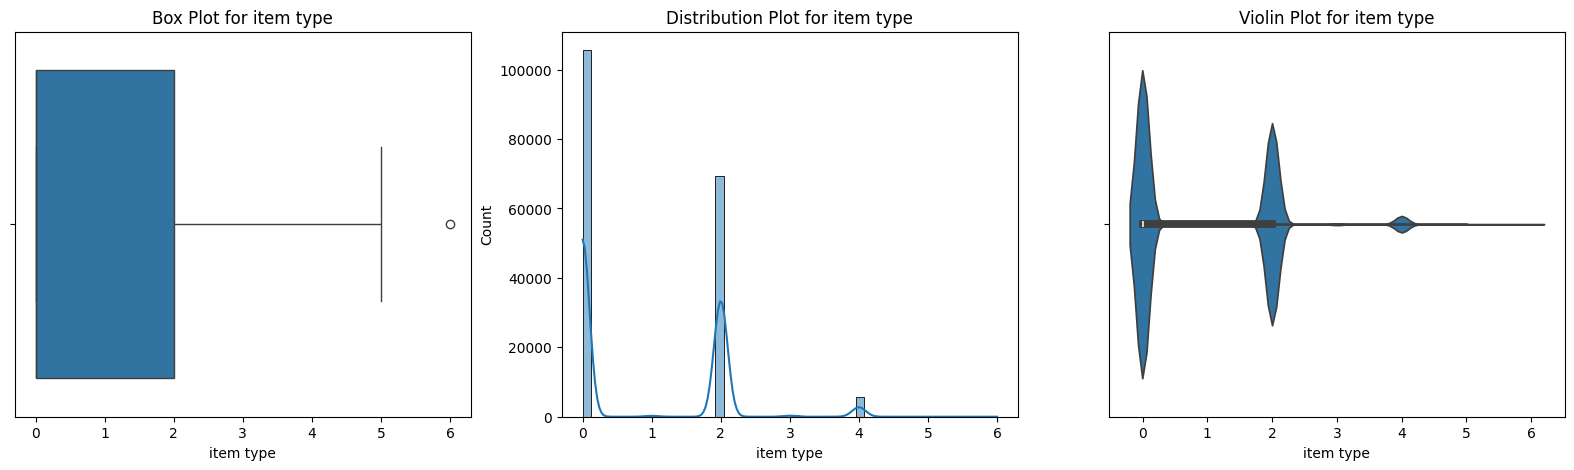

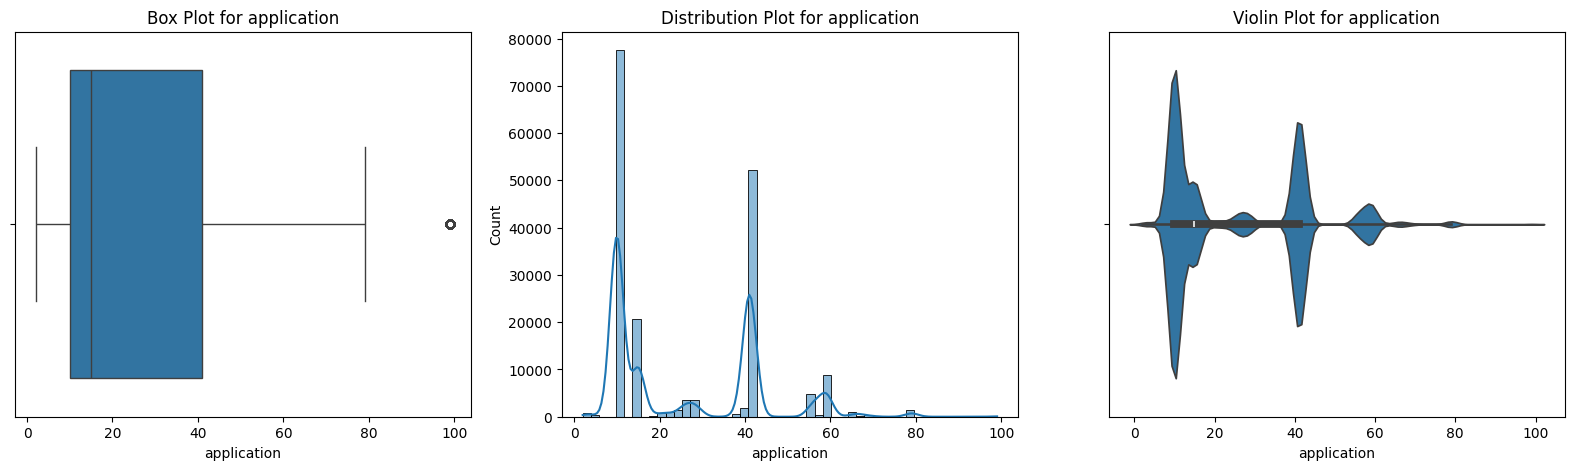

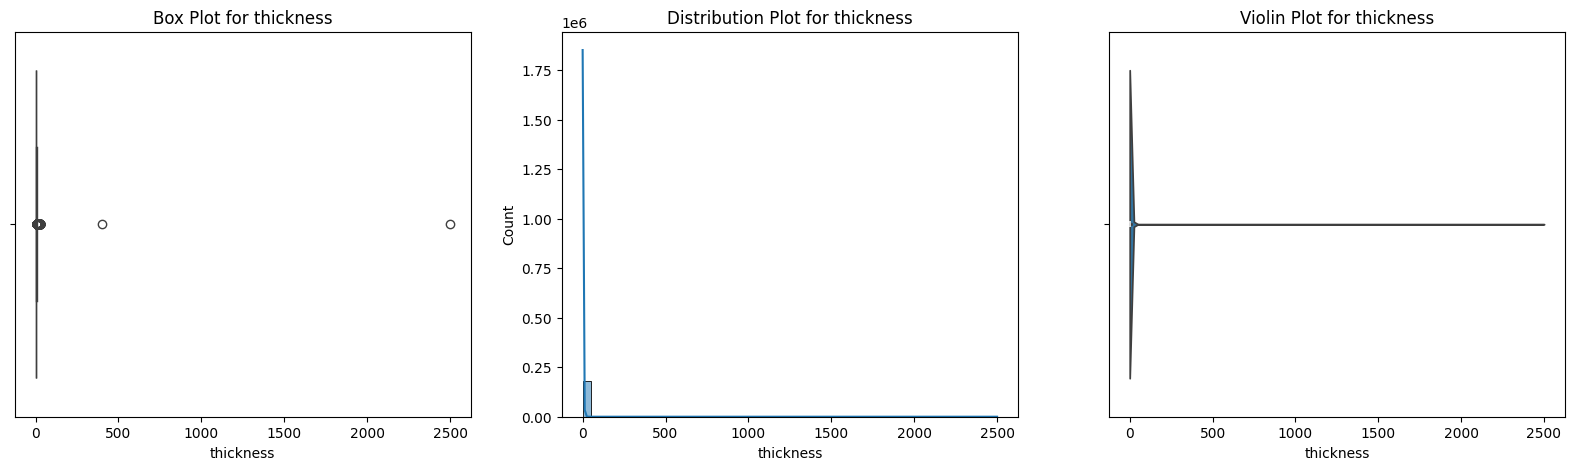

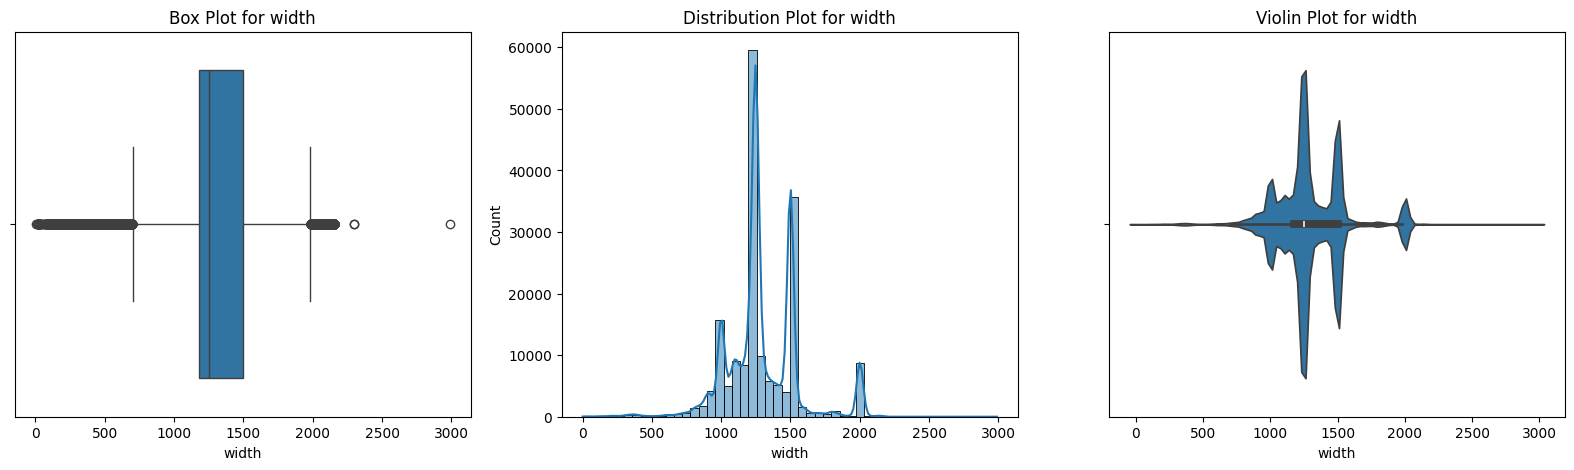

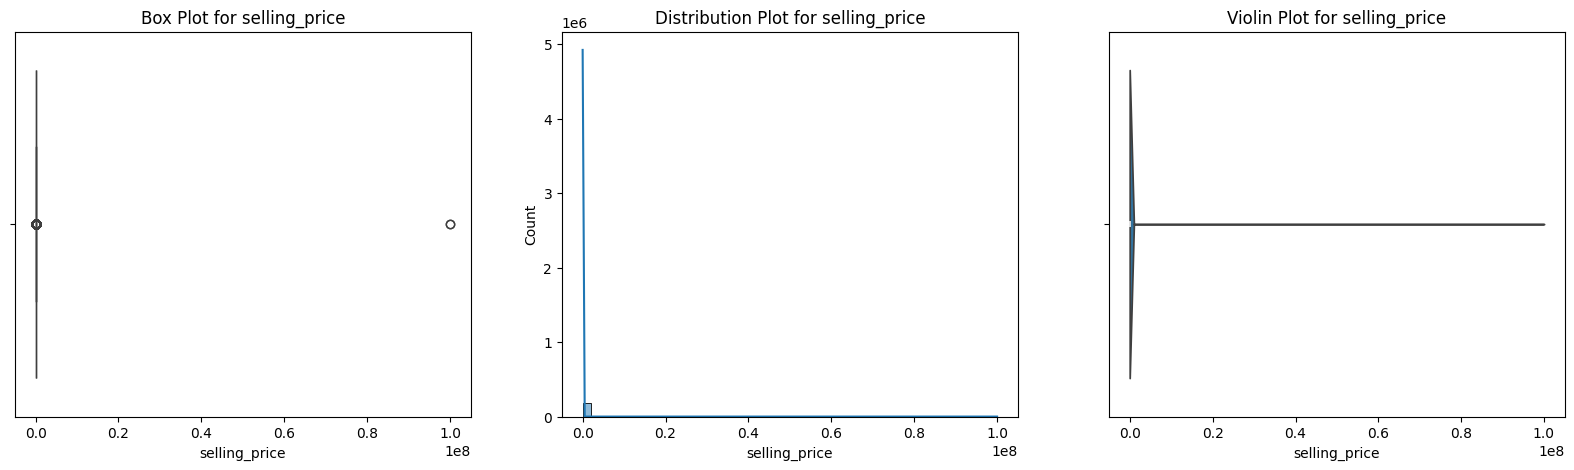

In [32]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [33]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1,0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,1,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,2,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,0,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25.0,1,0,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25.0,1,0,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105
181671,2020-07-02,2000.000000,30200854.0,25.0,1,0,41.0,0.85,1250.0,164141591,2020-07-01,601.00,7.600902,-0.162519,6.398595


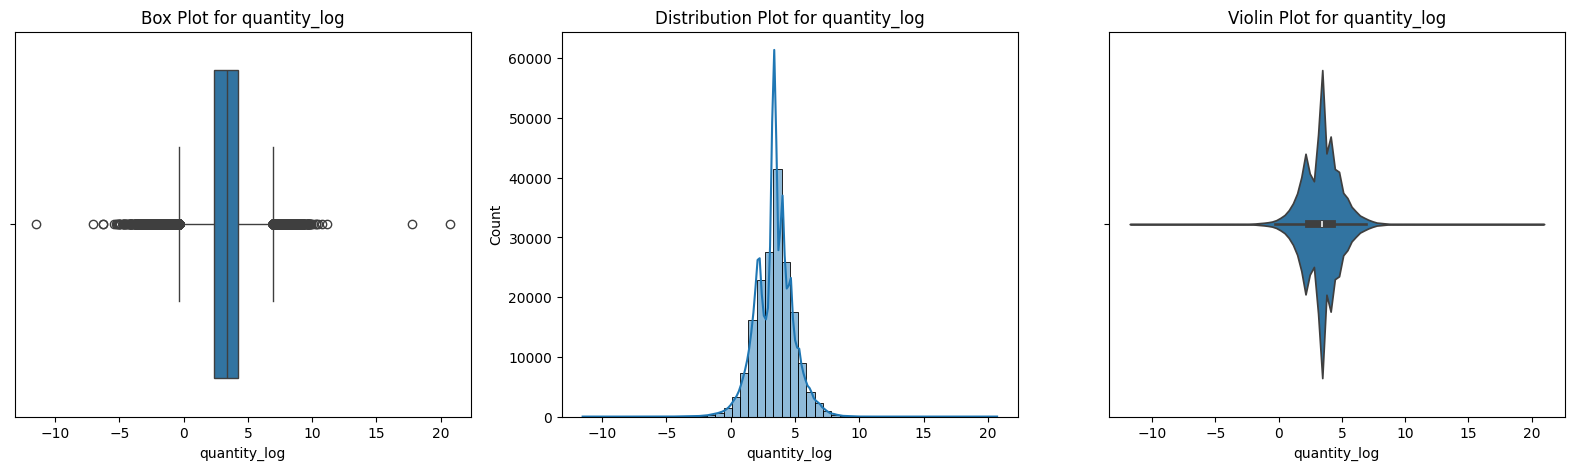

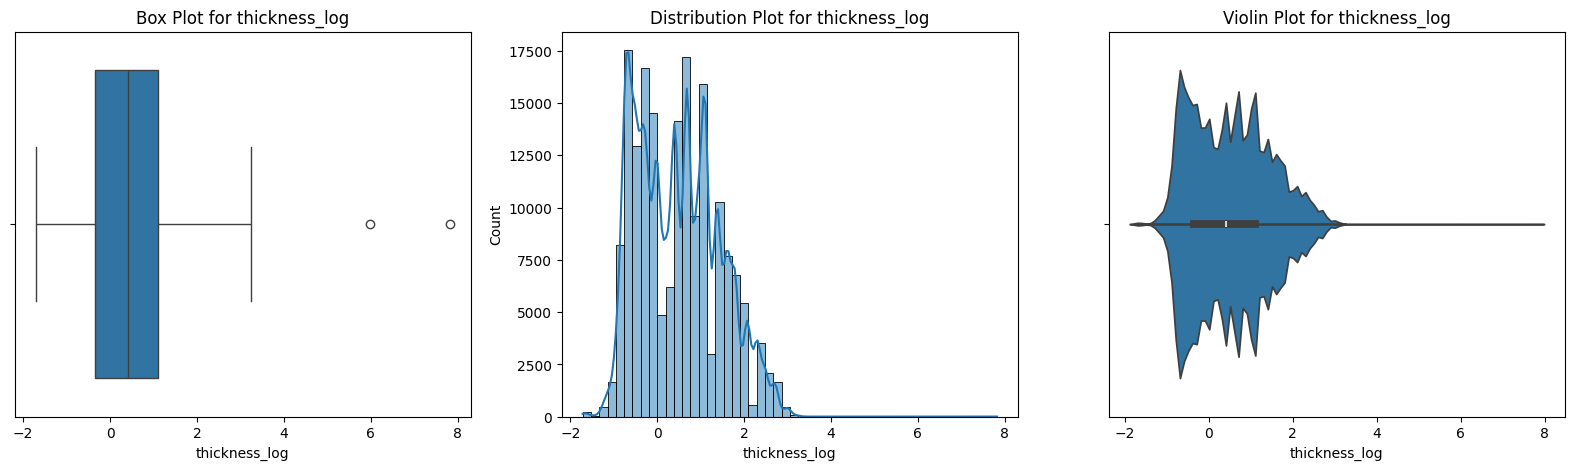

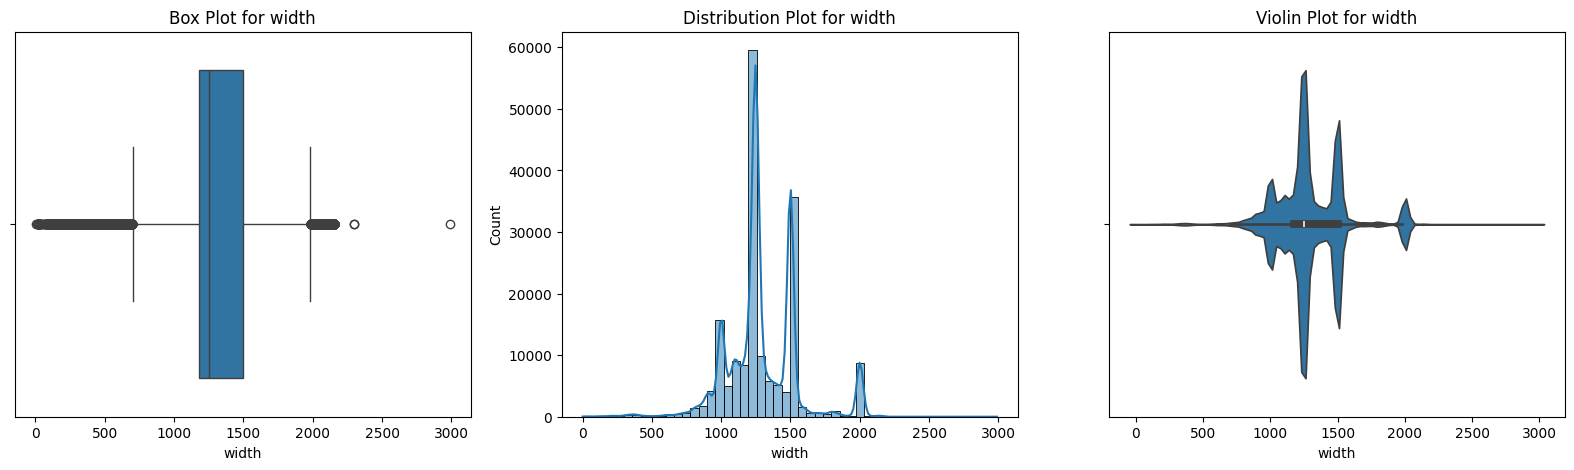

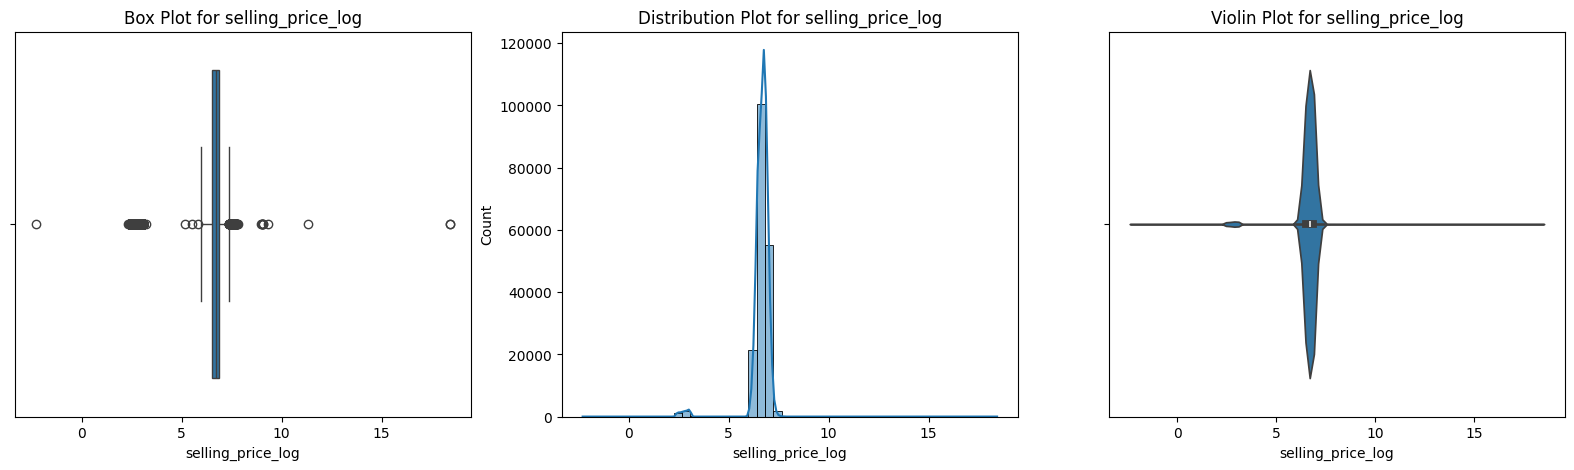

In [34]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [35]:
df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1,0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,1,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,2,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,0,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25.0,1,0,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25.0,1,0,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105
181671,2020-07-02,2000.000000,30200854.0,25.0,1,0,41.0,0.85,1250.0,164141591,2020-07-01,601.00,7.600902,-0.162519,6.398595


In [36]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [37]:
outlier(df2, 'quantity_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1,0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,1,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,2,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,0,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,0,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25.0,1,0,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25.0,1,0,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105
181671,2020-07-02,2000.000000,30200854.0,25.0,1,0,41.0,0.85,1250.0,164141591,2020-07-01,601.00,6.924905,-0.162519,6.398595


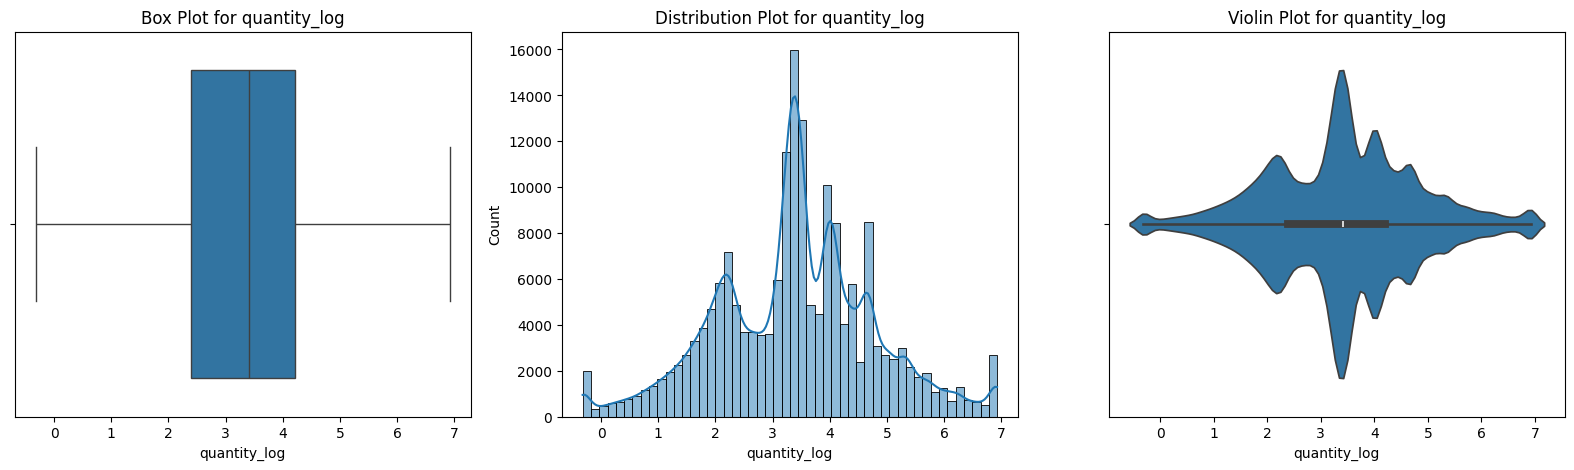

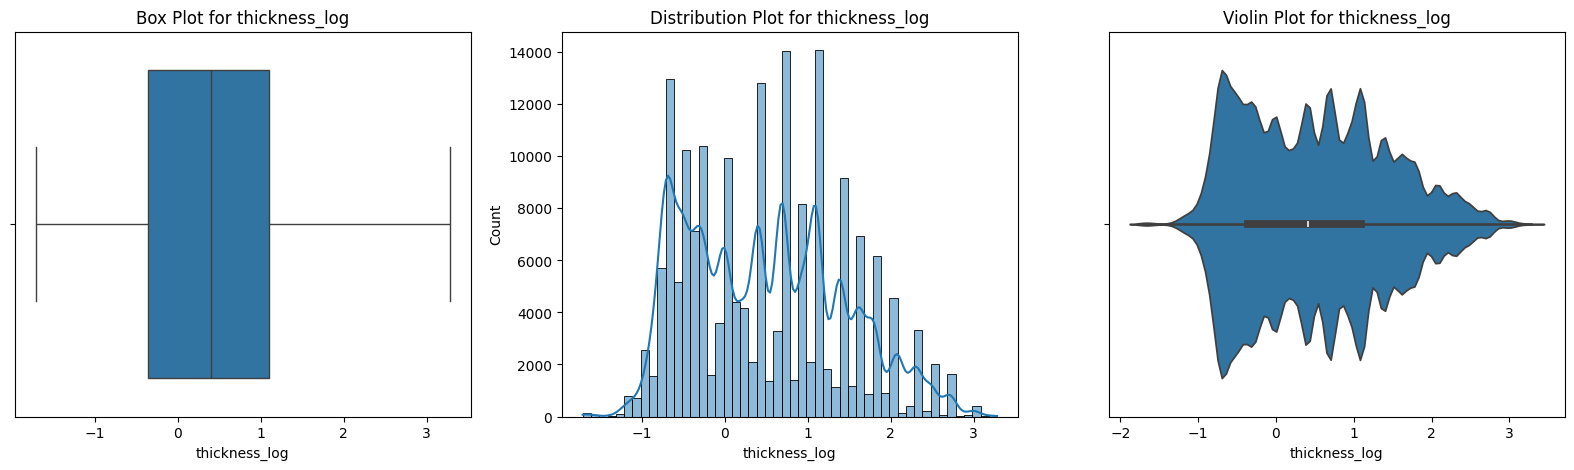

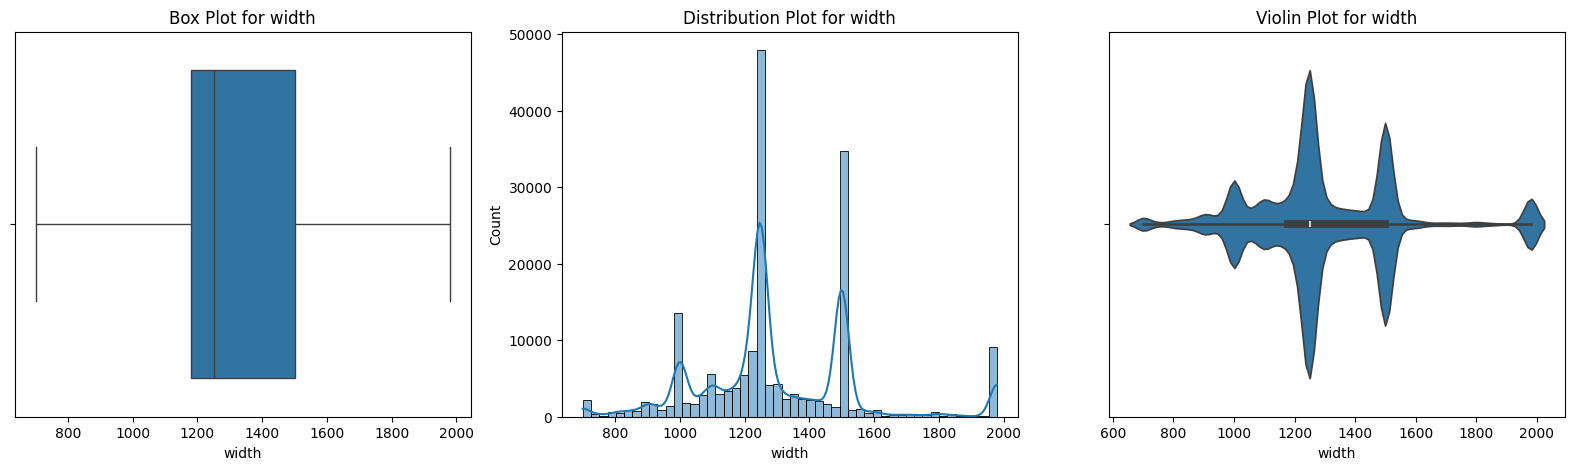

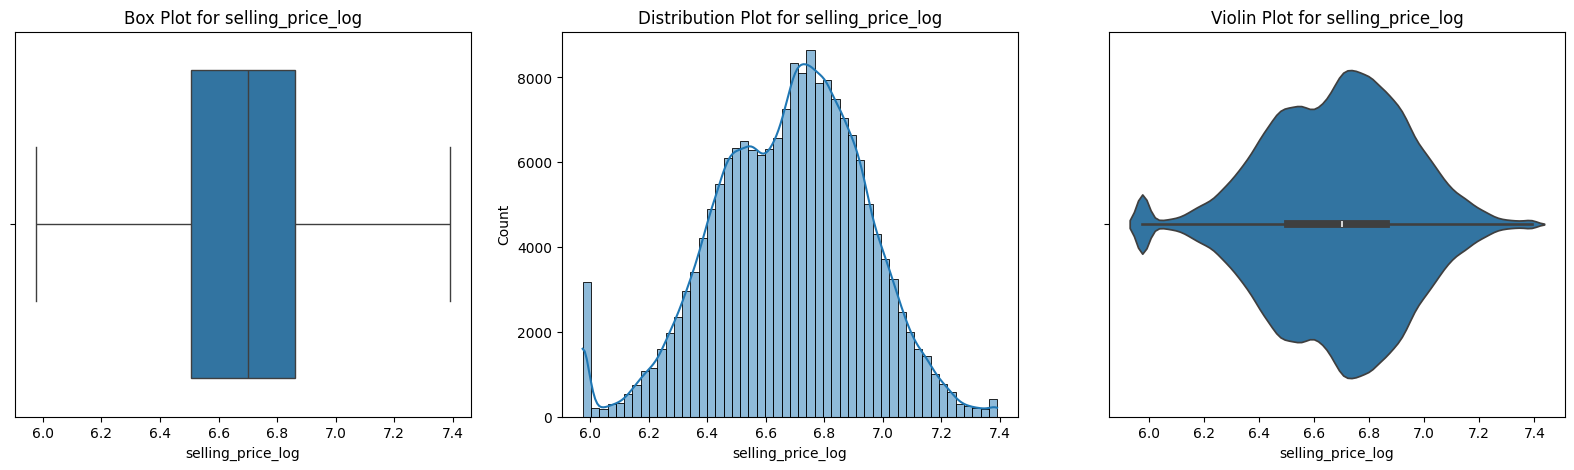

In [38]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [39]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181673.0,5874.94803,0.00001,10.970711,30.365004,67.161454,1000000000.0,2349074.776438
customer,181673.0,30512207.073368,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.626356
country,181673.0,44.898125,25.0,26.0,30.0,78.0,113.0,24.405794
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
item type,181673.0,0.900558,0.0,0.0,0.0,2.0,6.0,1.117545
application,181673.0,25.613746,2.0,10.0,15.0,41.0,99.0,17.753909
thickness,181673.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1297.045583,700.0,1180.0,1250.0,1500.0,1980.0,248.961933
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


In [40]:
# after add the new column of 'quantity_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,1,0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1,0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1,1,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1,2,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1,0,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,1,0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,1,0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,1,0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105
181671,2020-07-02,30200854.0,25.0,1,0,41.0,1250.0,164141591,2020-07-01,6.924905,-0.162519,6.398595


In [41]:
# check the data types
df3.dtypes

item_date            datetime64[ns]
customer                    float64
country                     float64
status                        int64
item type                     int64
application                 float64
width                       float64
product_ref                   int64
delivery date        datetime64[ns]
quantity_log                float64
thickness_log               float64
selling_price_log           float64
dtype: object

<Axes: >

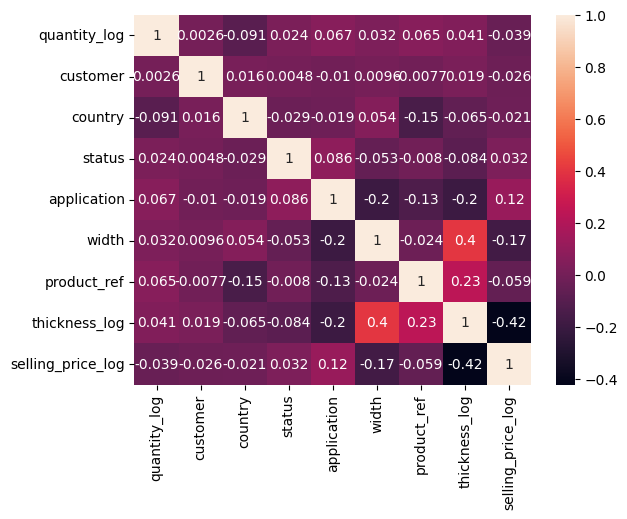

In [42]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [43]:
#wrong delivery date handling
df4 = df3.copy()
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,1,0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1,0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1,1,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1,2,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1,0,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,1,0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,1,0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,1,0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105
181671,2020-07-02,30200854.0,25.0,1,0,41.0,1250.0,164141591,2020-07-01,6.924905,-0.162519,6.398595


In [44]:
# find the difference between item and delivery date and add the new column of dataframe

df4['Date_difference'] = (df4['delivery date'] - df4['item_date']).dt.days
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_log,thickness_log,selling_price_log,Date_difference
0,2021-04-01,30156308.0,28.0,1,0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91
1,2021-04-01,30202938.0,25.0,1,0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0
2,2021-04-01,30153963.0,30.0,1,1,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211,-90
3,2021-04-01,30349574.0,32.0,1,2,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90
4,2021-04-01,30211560.0,28.0,1,0,10.0,1980.0,640665,2021-03-01,6.666354,1.386294,6.357842,-31


In [45]:
# Swap dates if the difference is negative
mask = df4['Date_difference'] < 0
df4.loc[mask, ['item_date', 'delivery date']] = df4.loc[mask, ['delivery date', 'item_date']].values

# Recalculate the difference
df4['Date_difference'] = (df4['delivery date'] - df4['item_date']).dt.days
df4.head()


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_log,thickness_log,selling_price_log,Date_difference
0,2021-04-01,30156308.0,28.0,1,0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91
1,2021-04-01,30202938.0,25.0,1,0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0
2,2021-01-01,30153963.0,30.0,1,1,28.0,952.0,628377,2021-04-01,5.956169,-0.967584,6.468211,90
3,2021-01-01,30349574.0,32.0,1,2,59.0,1317.0,1668701718,2021-04-01,5.310301,0.832909,6.643790,90
4,2021-03-01,30211560.0,28.0,1,0,10.0,1980.0,640665,2021-04-01,6.666354,1.386294,6.357842,31


In [46]:
# split the day, month, and year from 'delivery_date' & 'item_date' column and add dataframe (This data also help us to prediction)

df4['delivery_date_day'] = df4['delivery date'].dt.day
df4['delivery_date_month'] = df4['delivery date'].dt.month
df4['delivery_date_year'] = df4['delivery date'].dt.year

df4['item_date_day'] = df4['item_date'].dt.day
df4['item_date_month'] = df4['item_date'].dt.month
df4['item_date_year'] = df4['item_date'].dt.year
# finally drop the item_date, delivery_date and date_difference columns
df4.drop(columns=['item_date','delivery date','Date_difference'], inplace=True)
df4

,customer,country,status,item type,application,width,product_ref,quantity_log,thickness_log,selling_price_log,delivery_date_day,delivery_date_month,delivery_date_year,item_date_day,item_date_month,item_date_year
0,30156308.0,28.0,1,0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,7,2021,1,4,2021
1,30202938.0,25.0,1,0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30153963.0,30.0,1,1,28.0,952.0,628377,5.956169,-0.967584,6.468211,1,4,2021,1,1,2021
3,30349574.0,32.0,1,2,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,1,4,2021,1,1,2021
4,30211560.0,28.0,1,0,10.0,1980.0,640665,6.666354,1.386294,6.357842,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,7,2020
181671,30200854.0,25.0,1,0,41.0,1250.0,164141591,6.924905,-0.162519,6.398595,2,7,2020,1,7,2020


In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pickle

In [48]:
df5 = df4.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df5 = df5[(df5.status == 1) | (df5.status == 0)]
df5

,customer,country,status,item type,application,width,product_ref,quantity_log,thickness_log,selling_price_log,delivery_date_day,delivery_date_month,delivery_date_year,item_date_day,item_date_month,item_date_year
0,30156308.0,28.0,1,0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,7,2021,1,4,2021
1,30202938.0,25.0,1,0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30153963.0,30.0,1,1,28.0,952.0,628377,5.956169,-0.967584,6.468211,1,4,2021,1,1,2021
3,30349574.0,32.0,1,2,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,1,4,2021,1,1,2021
4,30211560.0,28.0,1,0,10.0,1980.0,640665,6.666354,1.386294,6.357842,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,7,2020
181671,30200854.0,25.0,1,0,41.0,1250.0,164141591,6.924905,-0.162519,6.398595,2,7,2020,1,7,2020


In [49]:
df5.status.value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [50]:
X = df5.drop('status', axis=1)
y = df5['status']

In [51]:
#Balancing the dataset using smoteENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [52]:
X.shape, y.shape, X_resampled.shape, y_resampled.shape

((150450, 15), (150450,), (210932, 15), (210932,))

In [53]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(X_resampled,y_resampled, algorithm):

    model = algorithm().fit(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [54]:
print(machine_learning_classification(X_resampled,y_resampled, DecisionTreeClassifier))
print(machine_learning_classification(X_resampled,y_resampled, ExtraTreesClassifier))
print(machine_learning_classification(X_resampled,y_resampled, RandomForestClassifier))
print(machine_learning_classification(X_resampled,y_resampled, AdaBoostClassifier))
print(machine_learning_classification(X_resampled,y_resampled, GradientBoostingClassifier))
print(machine_learning_classification(X_resampled,y_resampled, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.9660671427301549, 'accuracy_test': 0.9651788465641075}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.968858336543305, 'accuracy_test': 0.9682129565980041}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9746836943316839, 'accuracy_test': 0.9743759926043568}


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.6845417642004208, 'accuracy_test': 0.6858984995377723}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.6990310824024416, 'accuracy_test': 0.6980112356887193}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9191264926368189, 'accuracy_test': 0.9188612605779032}


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [61]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [62]:
grid_search.best_score_

0.9848765889359685

In [63]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9951228184538801, 0.9876976319719345)

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# predict the status and check the accuracy using metrics

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21299
           1       1.00      0.98      0.99     20888

    accuracy                           0.99     42187
   macro avg       0.99      0.99      0.99     42187
weighted avg       0.99      0.99      0.99     42187

[[21236    63]
 [  441 20447]]


In [65]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9879647570585385


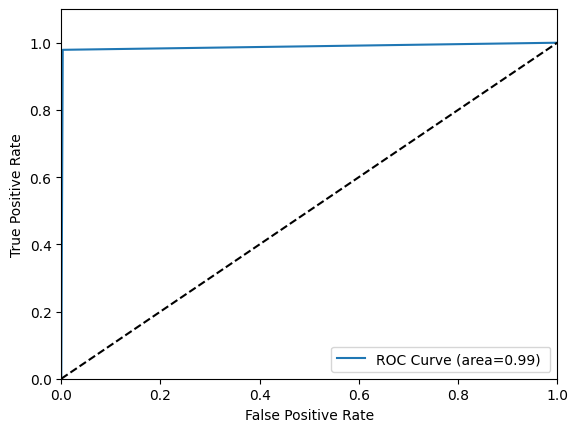

In [66]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [67]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,5,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30165992,77,2,10,1500,164141591,3.6,0,7.1,1,8,2021,1,9,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [71]:
# load pickle model to predict the status (like Trained brain).

with open(r'C:\Users\91916\GUVI_DS\classification_model.pkl', 'rb') as f:
    model = pickle.load(f)
user_data = np.array([[30165992,77,2,10,1500,164141591,3.6,0,7.1,1,8,2021,1,9,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
#Regression model

In [73]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [74]:
df5.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity_log', 'thickness_log', 'selling_price_log',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year',
       'item_date_day', 'item_date_month', 'item_date_year'],
      dtype='object')

In [75]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    X = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    model = algorithm().fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [76]:
print(machine_learning_regression(df5, DecisionTreeRegressor))
print(machine_learning_regression(df5, ExtraTreesRegressor))
print(machine_learning_regression(df5, RandomForestRegressor))
print(machine_learning_regression(df5, AdaBoostRegressor))
print(machine_learning_regression(df5, GradientBoostingRegressor))
print(machine_learning_regression(df5, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999236313399784, 'R2_test': 0.930105065714409}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999236313399784, 'R2_test': 0.9559148877629539}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9942249550926727, 'R2_test': 0.9592691210287037}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7243948131160933, 'R2_test': 0.7212504040694984}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8920399396456349, 'R2_test': 0.8879139954906721}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9524953891666949, 'R2_test': 0.9451230335826385}


In [ ]:
#selecting randomforest regressor

In [77]:
X = df5.drop(columns=['selling_price_log'], axis=1)
y = df5['selling_price_log']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [78]:
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9565837490561024)

In [79]:
# pass the parameters and check the accuracy for both training and testing & overfitting

X = df5.drop(columns=['selling_price_log'], axis=1)
y = df5['selling_price_log']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9886355090686331, 0.9594224255433458)

In [80]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

X = df5.drop(columns=['selling_price_log'], axis=1)
y = df5['selling_price_log']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9594506935285979,
 'Mean Absolute Error': 0.030537509589231075,
 'Mean Squared Error': 0.0023011139572479394,
 'Root Mean Squared Error': 0.04796992763438297}

In [81]:
# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,5,2021]])
y_pred = model.predict(user_data)
y_pred[0]

C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


6.900209388075906

In [82]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

992.4825078523468

In [83]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [84]:
# load the pickle model to predict selling price

with open(r'C:\Users\91916\GUVI_DS\regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,5,2021]]))
np.exp(y_pred[0])

C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


992.4825078523468